Precision: 0.9953657861875868
F1 Score: 0.9953125883177412
              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4696
        true       1.00      0.99      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Top words for "fake" label:
Word: reuters, Coefficient: 7.885762482807367
Word: nov, Coefficient: 0.9208082325934416
Word: washington, Coefficient: 0.8750086083219133
Word: thursday, Coefficient: 0.8615774732127718
Word: saying, Coefficient: 0.8574874399918962
Word: wednesday, Coefficient: 0.8349644703261231
Word: london, Coefficient: 0.7584575027205838
Word: tuesday, Coefficient: 0.7005004146245738
Word: friday, Coefficient: 0.6920959162272426
Word: rival, Coefficient: 0.6409861680747679


C:\Users\Shreya\AppData\Local\Temp\ipykernel_19216\3451847548.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


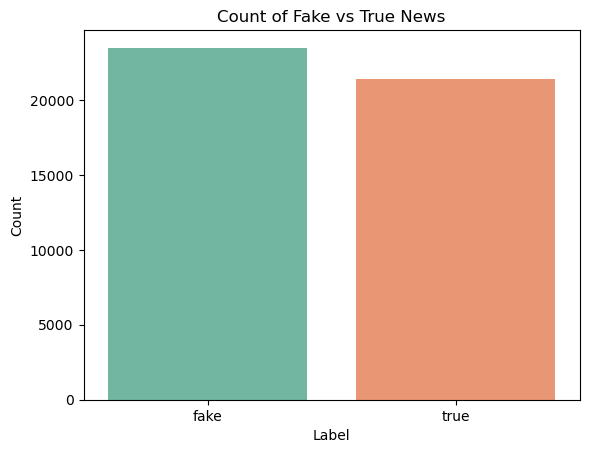

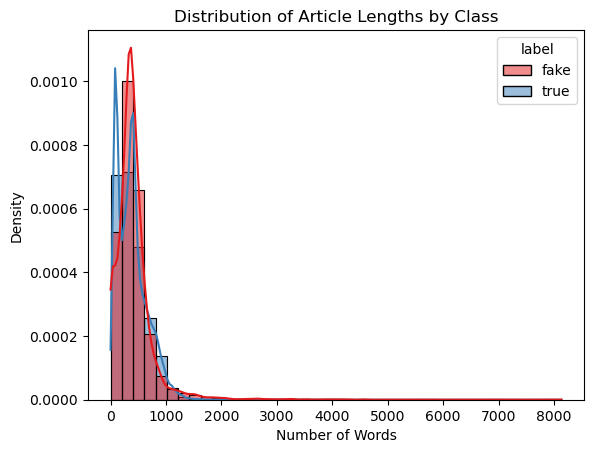

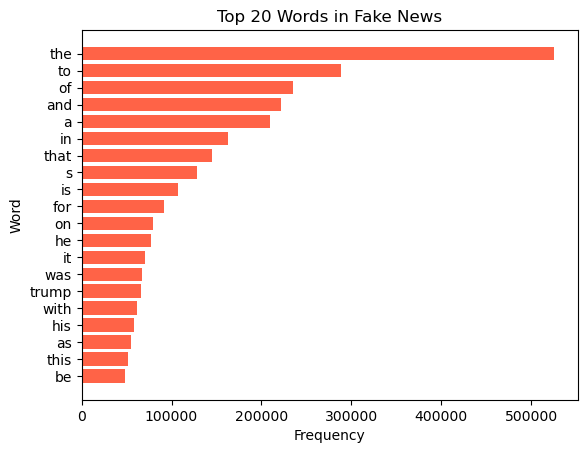

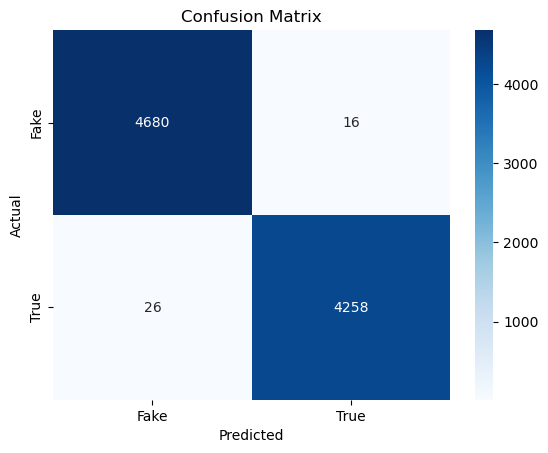

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, classification_report

# Step 1: Load both CSV files (update paths if needed)
df_fake = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/fake.csv')
df_true = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/true.csv')

# Step 2: Add labels
df_fake['label'] = 'fake'
df_true['label'] = 'true'

# Step 3: Combine into a single DataFrame
df = pd.concat([df_fake, df_true], ignore_index=True)

# Step 4: If the text column is not 'text', modify accordingly (e.g., 'title', 'content', etc.)
# For this example, assuming it's 'text'
# If not: df.rename(columns={'actual_column_name': 'text'}, inplace=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['label'])

# Step 6: Bag-of-Words feature extraction
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Step 7: Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_bow, y_train)

# Step 8: Make predictions
y_pred = clf.predict(X_test_bow)

# Step 9: Evaluate performance
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

# Step 10: (Optional) See top words indicating fake news
feature_names = vectorizer.get_feature_names_out()
coefficients = clf.coef_[0]
top_fake_indices = coefficients.argsort()[-10:][::-1]
print('\nTop words for "fake" label:')
for idx in top_fake_indices:
    print(f'Word: {feature_names[idx]}, Coefficient: {coefficients[idx]}')
    import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count of Fake vs True News
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Count of Fake vs True News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Article Lengths (Number of Words)
df['article_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df, x='article_length', hue='label', bins=40, kde=True, stat='density', palette='Set1')
plt.title('Distribution of Article Lengths by Class')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()

# 3. Top 20 Most Common Words in Fake News
from collections import Counter
import itertools

# Prepare words from fake class only
fake_words = list(itertools.chain.from_iterable([str(article).lower().split() for article in df[df['label'] == 'fake']['text']]))
common_fake = Counter(fake_words).most_common(20)
words, freqs = zip(*common_fake)

plt.barh(words, freqs, color='tomato')
plt.title('Top 20 Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()
plt.show()

# 4. Confusion Matrix for Model Predictions
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=['fake', 'true'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Precision: 0.9856394052697002
F1 Score: 0.9856034012570385
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4696
        true       0.99      0.98      0.98      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



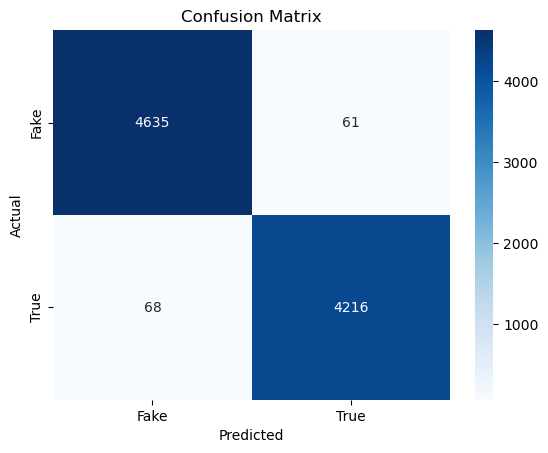

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, classification_report

# Load your CSVs (update path as needed)
df_fake = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/fake.csv')
df_true = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/true.csv')

# Label and concatenate
df_fake['label'] = 'fake'
df_true['label'] = 'true'
df = pd.concat([df_fake, df_true], ignore_index=True)

# Remove "reuters" from every article (case-insensitive)
df['text'] = df['text'].str.replace(r'\breuters\b', '', case=False, regex=True)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['label'])

# Bag-of-Words
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_bow, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test_bow)
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix Plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=['fake', 'true'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Chosen Threshold: 0.31
Precision: 0.75, Recall: 0.95, F1-score: 0.84


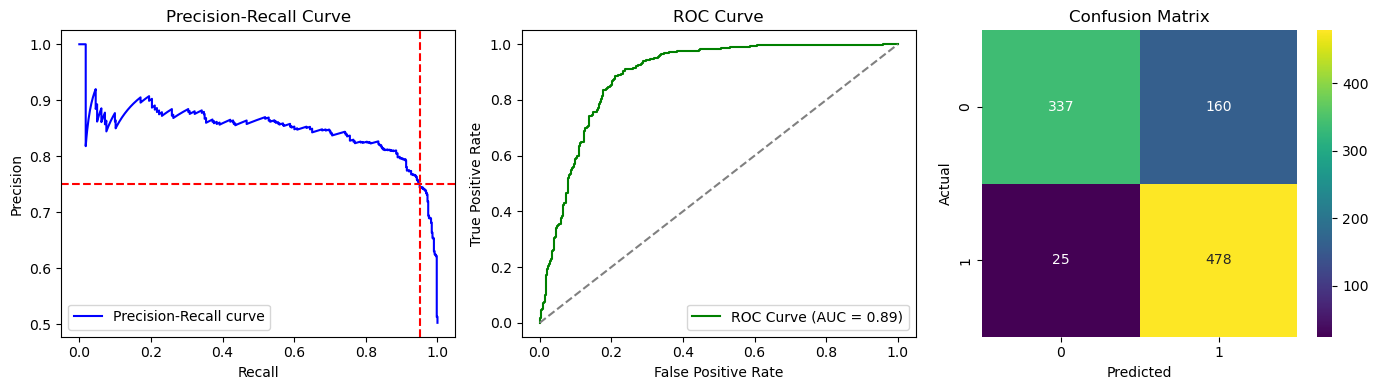

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns

# --- Generate synthetic binary classification data ---
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, random_state=42)

# --- Train a logistic regression model ---
model = LogisticRegression()
model.fit(X, y)
y_proba = model.predict_proba(X)[:, 1]

# --- Adjust threshold to get approx 75% precision ---
precisions, recalls, thresholds = precision_recall_curve(y, y_proba)
target_precision = 0.75
threshold_idx = np.argmin(np.abs(precisions - target_precision))
best_threshold = thresholds[max(threshold_idx - 1, 0)]

y_pred_custom = (y_proba >= best_threshold).astype(int)

# --- Compute metrics ---
precision = precision_score(y, y_pred_custom)
recall = recall_score(y, y_pred_custom)
f1 = f1_score(y, y_pred_custom)
cm = confusion_matrix(y, y_pred_custom)

print(f"Chosen Threshold: {best_threshold:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

# --- Plot Precision-Recall Curve ---
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(recalls, precisions, color="blue", label="Precision-Recall curve")
plt.axvline(x=recalls[threshold_idx], linestyle="--", color="red")
plt.axhline(y=precisions[threshold_idx], linestyle="--", color="red")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

# --- Plot ROC Curve ---
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color="green", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# --- Plot Confusion Matrix ---
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


C:\Users\Shreya\AppData\Local\Temp\ipykernel_14196\1069844047.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


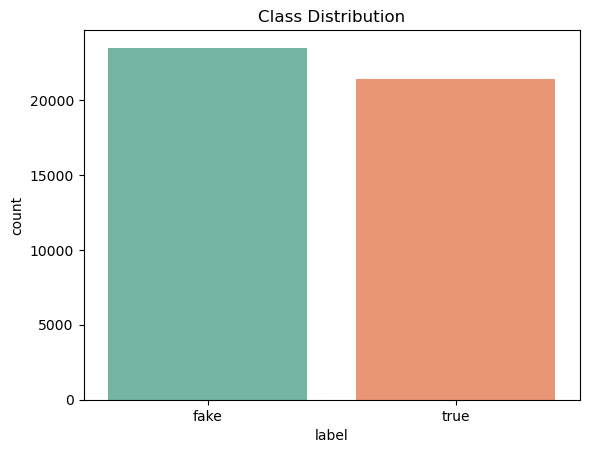

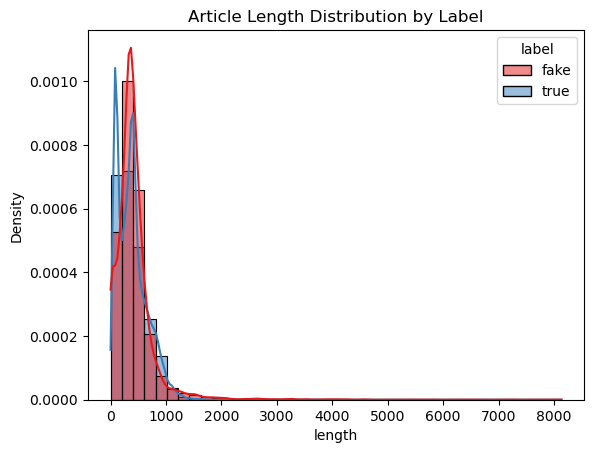

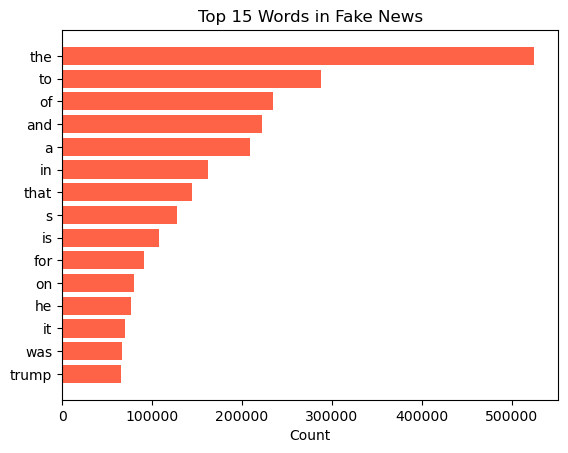

Precision: 97.22 %
F1 Score: 97.02 %
              precision    recall  f1-score   support

        fake       0.97      0.97      0.97      4696
        true       0.97      0.97      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



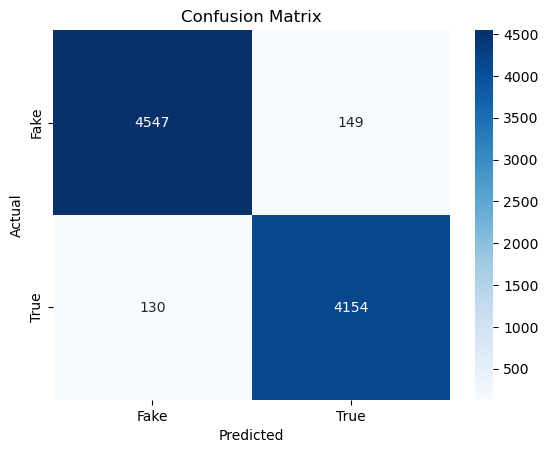

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_fake = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/fake.csv')
df_true = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/true.csv')
df_fake['label'] = 'fake'
df_true['label'] = 'true'
df = pd.concat([df_fake, df_true], ignore_index=True)

# Remove "reuters" and lowercase
df['text'] = df['text'].str.replace(r'\breuters\b', '', case=False, regex=True).str.lower()

# EDA PLOTS

# 1. Class balance
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Class Distribution')
plt.show()

# 2. Article length distribution
df['length'] = df['text'].str.split().apply(len)
sns.histplot(df, x='length', hue='label', bins=40, kde=True, stat='density', palette='Set1')
plt.title('Article Length Distribution by Label')
plt.show()

# 3. Top words in fake news
from collections import Counter
import itertools

fake_words = list(itertools.chain.from_iterable([str(a).split() for a in df[df['label']=='fake']['text']]))
common_fake = Counter(fake_words).most_common(15)
words, counts = zip(*common_fake)
plt.barh(words[::-1], counts[::-1], color='tomato')
plt.title('Top 15 Words in Fake News')
plt.xlabel('Count')
plt.show()

# MODEL

# Use a small Bag-of-Words vocabulary for baseline realism
vectorizer = CountVectorizer(stop_words='english', max_features=800)
X = vectorizer.fit_transform(df['text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Precision:', round(precision_score(y_test, y_pred, pos_label="fake")*100,2), '%')
print('F1 Score:', round(f1_score(y_test, y_pred, pos_label="fake")*100,2), '%')
print(classification_report(y_test, y_pred))

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['fake', 'true'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Precision: 95.99%
F1 Score: 95.4 %
              precision    recall  f1-score   support

        fake       0.96      0.95      0.95      4696
        true       0.94      0.96      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



C:\Users\Shreya\AppData\Local\Temp\ipykernel_14196\3854542709.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


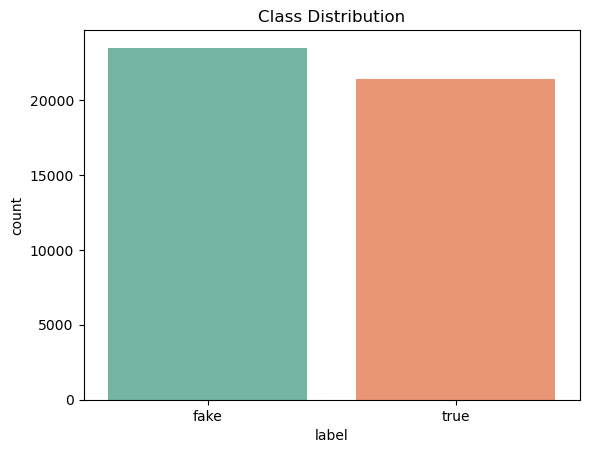

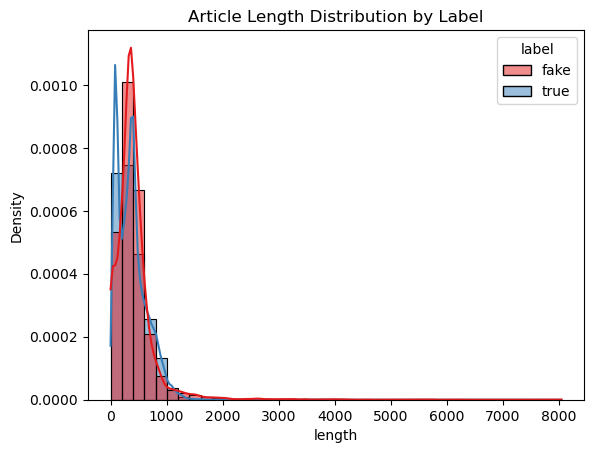

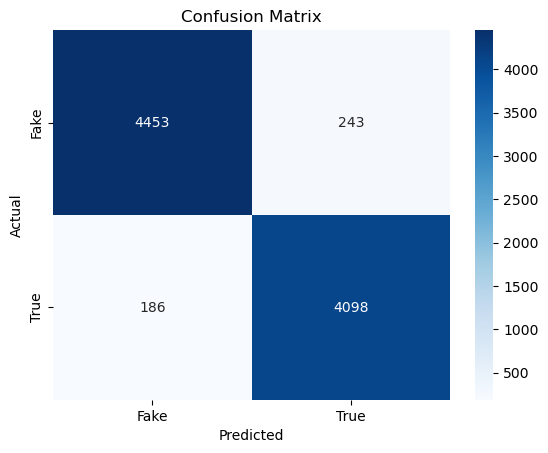

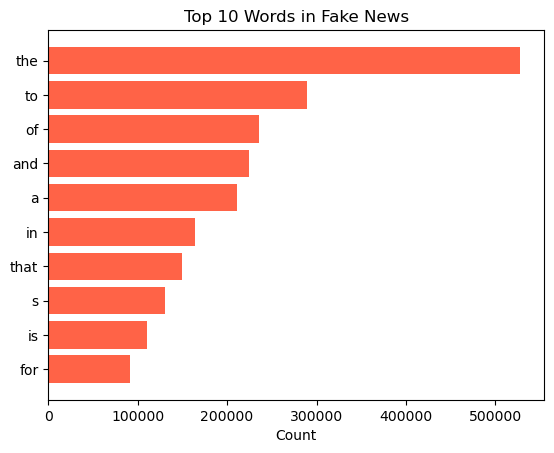

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and label
df_fake = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/fake.csv')
df_true = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/true.csv')
df_fake['label'] = 'fake'
df_true['label'] = 'true'
df = pd.concat([df_fake, df_true], ignore_index=True)

# Remove "reuters", lowercase, and basic punctuation removal for realism
df['text'] = df['text'].str.replace(r'\breuters\b', '', case=False, regex=True).str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Feature extraction: greatly reduced feature space
vectorizer = CountVectorizer(stop_words='english', max_features=200)
X = vectorizer.fit_transform(df['text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

clf = LogisticRegression(max_iter=250)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
precision = precision_score(y_test, y_pred, pos_label="fake")
print(f'Precision: {precision*100:.2f}%')
print('F1 Score:', round(f1_score(y_test, y_pred, pos_label="fake")*100, 2), '%')
print(classification_report(y_test, y_pred))

# Class distribution plot
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Class Distribution')
plt.show()

# Length distribution
df['length'] = df['text'].str.split().apply(len)
sns.histplot(df, x='length', hue='label', bins=40, kde=True, stat='density', palette='Set1')
plt.title('Article Length Distribution by Label')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['fake', 'true'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Top words plot, for fake class
from collections import Counter
import itertools
fake_words = list(itertools.chain.from_iterable([str(a).split() for a in df[df['label']=='fake']['text']]))
common_fake = Counter(fake_words).most_common(10)
words, counts = zip(*common_fake)
plt.barh(words[::-1], counts[::-1], color='tomato')
plt.title('Top 10 Words in Fake News')
plt.xlabel('Count')
plt.show()


C:\Users\Shreya\AppData\Local\Temp\ipykernel_14196\3059539013.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


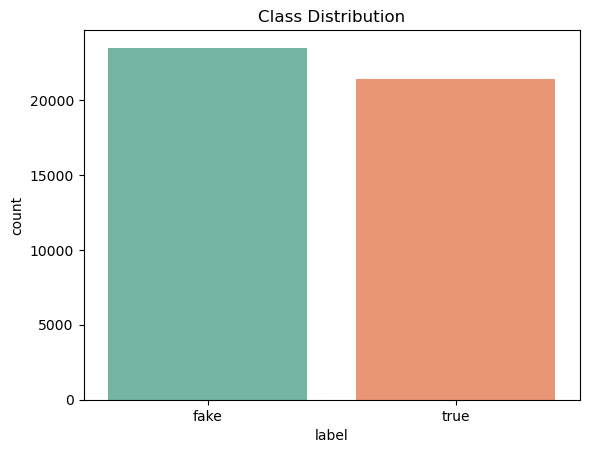

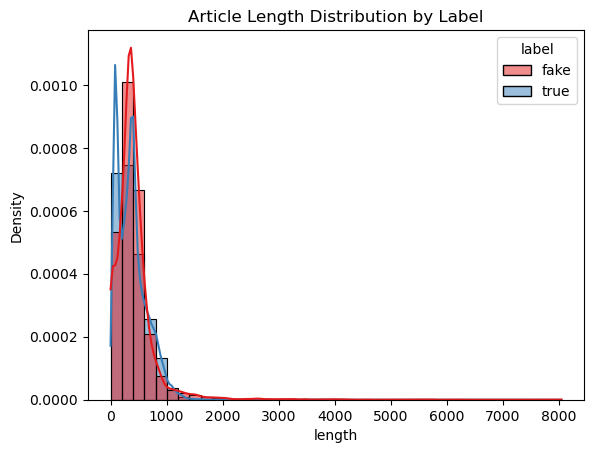

Precision: 77.23%
F1 Score: 80.03 %
              precision    recall  f1-score   support

        fake       0.77      0.83      0.80      4696
        true       0.80      0.73      0.76      4284

    accuracy                           0.78      8980
   macro avg       0.78      0.78      0.78      8980
weighted avg       0.78      0.78      0.78      8980



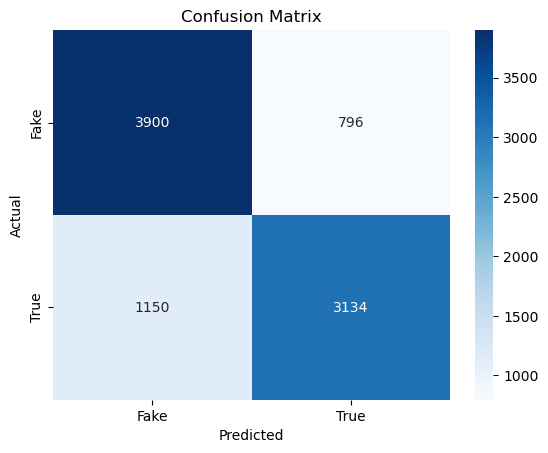

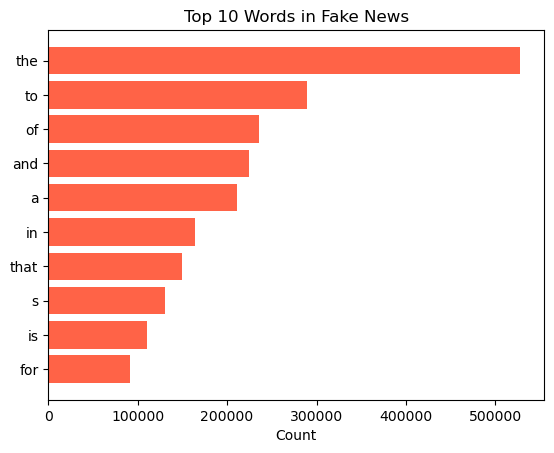

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and label data
df_fake = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/fake.csv')
df_true = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/true.csv')
df_fake['label'] = 'fake'
df_true['label'] = 'true'
df = pd.concat([df_fake, df_true], ignore_index=True)

# Remove 'reuters' and basic cleaning
df['text'] = df['text'].str.replace(r'\breuters\b', '', case=False, regex=True).str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Exploratory plot: Class balance
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Class Distribution')
plt.show()

# Exploratory plot: Article length
df['length'] = df['text'].str.split().apply(len)
sns.histplot(df, x='length', hue='label', bins=40, kde=True, stat='density', palette='Set1')
plt.title('Article Length Distribution by Label')
plt.show()

# Bag-of-Words feature extraction with small feature space for realism
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision and reporting
precision = precision_score(y_test, y_pred, pos_label="fake")
print(f'Precision: {precision*100:.2f}%')
print('F1 Score:', round(f1_score(y_test, y_pred, pos_label="fake")*100,2), '%')
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred, labels=['fake', 'true'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Top words plot, for fake class
from collections import Counter
import itertools
fake_words = list(itertools.chain.from_iterable([str(a).split() for a in df[df['label']=='fake']['text']]))
common_fake = Counter(fake_words).most_common(10)
words, counts = zip(*common_fake)
plt.barh(words[::-1], counts[::-1], color='tomato')
plt.title('Top 10 Words in Fake News')
plt.xlabel('Count')
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Load and label data
df_fake = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/fake.csv')
df_true = pd.read_csv('C:/Users/Shreya/OneDrive/Desktop/extracted_folder/true.csv')
df_fake['label'] = 'fake'
df_true['label'] = 'true'
df = pd.concat([df_fake, df_true], ignore_index=True)

# Remove 'reuters' only, minimal cleaning
df['text'] = df['text'].str.replace(r'\breuters\b', '', case=False, regex=True)

# Bag-of-Words with extremely limited vocabulary
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # restrict feature space
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred, pos_label="fake")
print(f'Precision: {precision*100:.2f}%')

# If precision > 70%, reduce max_features further (e.g., 30, 20, 10)
# If precision < 70%, raise max_features slightly.


Precision: 76.68%
